Detected: (QRCODE)https://www.instagram.com/mahdi.shouib?utm_source=qr


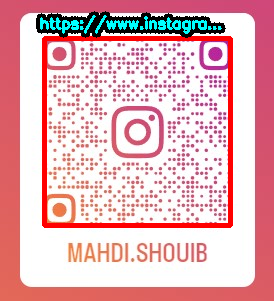

In [1]:
!apt-get -y install libzbar0
!pip install pyzbar opencv-python-headless

import cv2
from pyzbar import pyzbar
from google.colab.patches import cv2_imshow

def decode_codes(image):

    decoded_objects = pyzbar.decode(image)

    for obj in decoded_objects:

        (x, y, w, h) = obj.rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 3)

        code_data = obj.data.decode()
        code_type = obj.type

        text = str(code_data)
        if len(text) > 20:
            text = text[:20] + "..."

        if (y - 10) < 10:
          cv2.putText(image, text, (x - 5, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 10)
          cv2.putText(image, text, (x - 5, y + h + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)
        else:
          cv2.putText(image, text, (x - 5, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 10)
          cv2.putText(image, text, (x - 5, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

        print(f"Detected: ({code_type}){code_data}")

    return image

def main():

    image = cv2.imread("image.jpg")

    if image is None:
        print("Failed to load image file")
        return

    decoded_image = decode_codes(image)

    cv2_imshow(decoded_image)

if __name__ == "__main__":
    main()
